# Figures 

## SOSE

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
import gsw
from fastjmd95 import jmd95numba
from fastjmd95 import rho, drhods, drhodt
import json

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
omega_total = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/omega_total_newbins.zarr'))
R1 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/R1_newbins.zarr'))

In [4]:
wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/wmt_budget_terms_newbins.zarr'))
wmt_budget_terms['omega_total'] = omega_total.omega_total
wmt_budget_terms['R1'] = R1.R1
wmt_budget_terms = wmt_budget_terms.sel(time=slice('2006', '2010'))

wmt_budget_terms.load()

<xarray.Dataset>
Dimensions:               (time: 366, sigma2_bin: 99)
Coordinates:
  * time                  (time) datetime64[ns] 2006-01-01 ... 2010-12-31
  * sigma2_bin            (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
Data variables: (12/24)
    R1                    (time, sigma2_bin) float64 -7.392e+06 ... 0.0
    R1_slt                (time, sigma2_bin) float64 -1.15e+07 ... 0.0
    R1_th                 (time, sigma2_bin) float64 -1.319e+07 ... 0.0
    R2                    (time, sigma2_bin) float64 7.816e+06 8.187e+06 ... 0.0
    R2_slt                (time, sigma2_bin) float64 7.839e+06 8.74e+06 ... 0.0
    R2_th                 (time, sigma2_bin) float64 -9.438e+05 ... 0.0
    ...                    ...
    omega_total_th        (time, sigma2_bin) float64 -8.895e+06 ... 0.0
    omega_trans_rate      (time, sigma2_bin) float32 -2.822e+07 ... 0.0
    omega_trans_rate_slt  (time, sigma2_bin) float32 -1.935e+07 ... 0.0
    omega_trans_rate_th   (time, sigma2_bin) float32 -8.872e+06 ... 0.0
    psi_adv               (time, sigma2_bin) float32 8.737e+06 8.911e+06 ... 0.0
    psi_vel               (time, sigma2_bin) float64 9.212e+05 ... -0.0

In [5]:
#indices
indices = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/indices.zarr')).load()
deep = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/deep.zarr')).load()
bottom = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/bottom.zarr')).load()

#climatology ds
clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/clim_ds.zarr')).load()
#anomalous ds
anom = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/anom_ds.zarr')).load()

## Time mean budgets

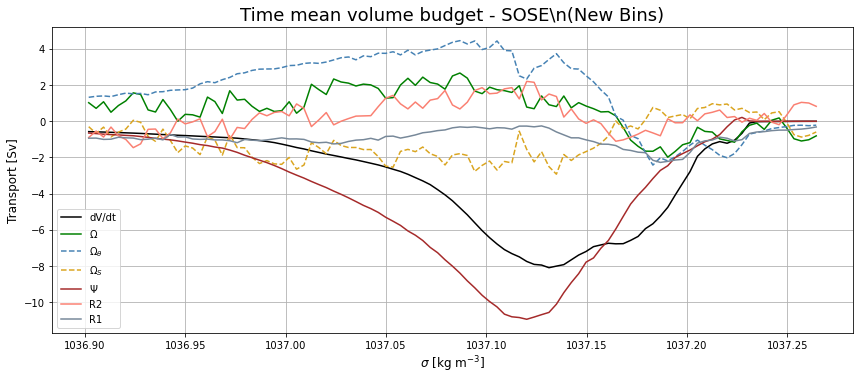

In [6]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Time mean volume budget - SOSE\n(New Bins)', fontsize=18);

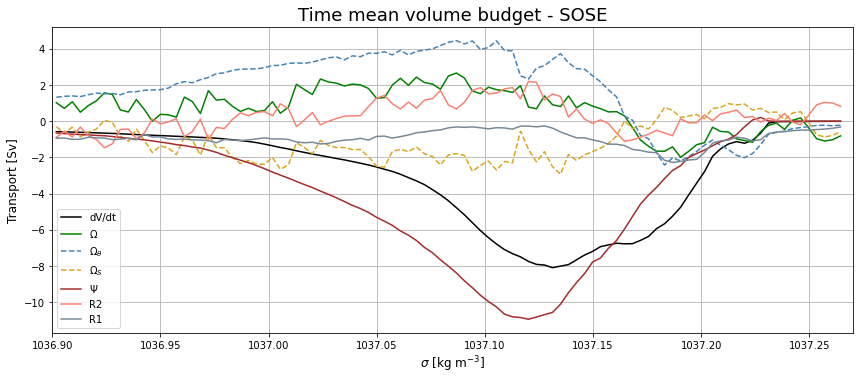

In [7]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.xlim(1036.90, 1037.27)
#plt.ylim(-12, 12)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Time mean volume budget - SOSE', fontsize=18);

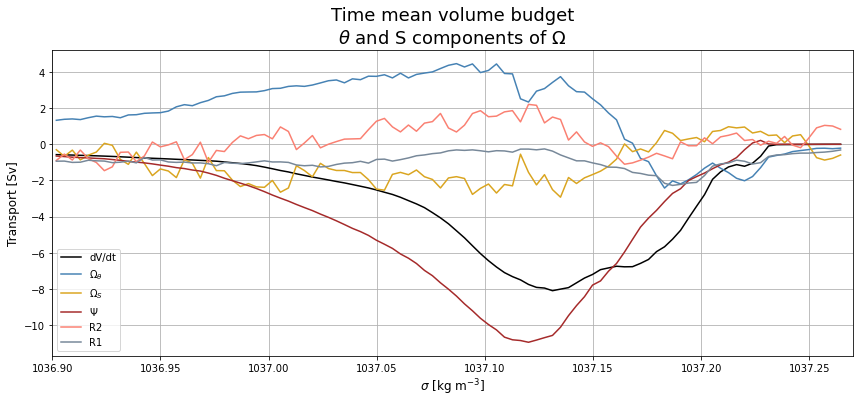

In [8]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
plt.xlim(1036.90, 1037.27)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

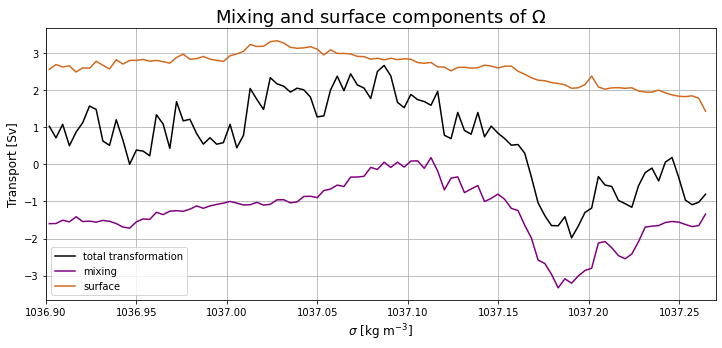

In [9]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
plt.xlim(1036.90, 1037.27)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

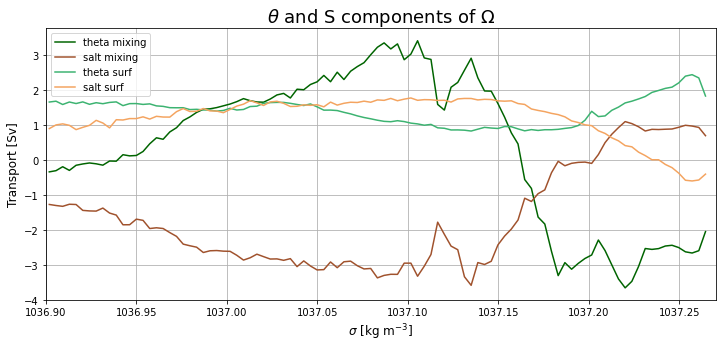

In [10]:
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(figsize=(12,5), label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
plt.xlim(1036.90, 1037.27)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

## Monthly Climatology

In [11]:
clim

<xarray.Dataset>
Dimensions:           (month: 12, sigma2_bin: 99)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * sigma2_bin        (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
Data variables:
    R1                (month, sigma2_bin) float64 -2.37 -2.077 ... -0.006441
    R2                (month, sigma2_bin) float64 -2.811 -2.8 ... 0.003102
    dVdt              (month, sigma2_bin) float64 -16.72 -16.59 ... -0.02164
    omega_mix         (month, sigma2_bin) float32 -6.315 -6.494 ... -0.01647
    omega_surf_slt    (month, sigma2_bin) float32 -2.003 -1.943 ... 0.0 0.0
    omega_surf_th     (month, sigma2_bin) float32 -4.877 -4.944 ... -0.008462
    omega_trans_rate  (month, sigma2_bin) float32 -12.68 -12.86 ... -0.02494
    psi_vel           (month, sigma2_bin) float64 -0.4061 -0.4329 ... 0.0 0.0

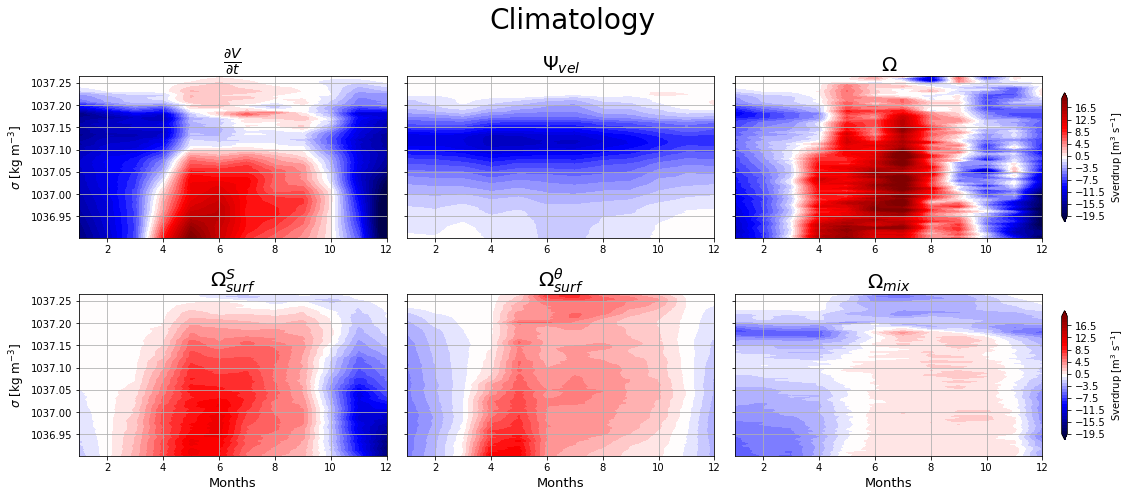

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

c = ax[0,0].contourf(clim.dVdt.month, 
                   clim.dVdt.sigma2_bin, 
                   clim.dVdt.T, cmap='seismic', levels=levels, extend='both')
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].grid()

c_psi = ax[0,1].contourf(clim.psi_vel.month, clim.psi_vel.sigma2_bin, clim.psi_vel.T,
                         cmap='seismic', levels=levels, extend='both')
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].grid()

c_omega = ax[0,2].contourf(clim.omega_trans_rate.month, clim.omega_trans_rate.sigma2_bin, clim.omega_trans_rate.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].grid()

c_surf_slt = ax[1,0].contourf(clim.omega_surf_slt.month, 
                                clim.omega_surf_slt.sigma2_bin, 
                                clim.omega_surf_slt.T, cmap='seismic', levels=levels, extend='both')
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Months', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].grid()

c_surf_th = ax[1,1].contourf(clim.omega_surf_th.month, clim.omega_surf_th.sigma2_bin, 
                        clim.omega_surf_th.T, cmap='seismic', levels=levels, extend='both')
ax[1,1].set_xlabel('Months', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].grid()

c_mix = ax[1,2].contourf(clim.omega_mix.month, clim.omega_mix.sigma2_bin, clim.omega_mix.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
ax[1,2].set_xlabel('Months', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

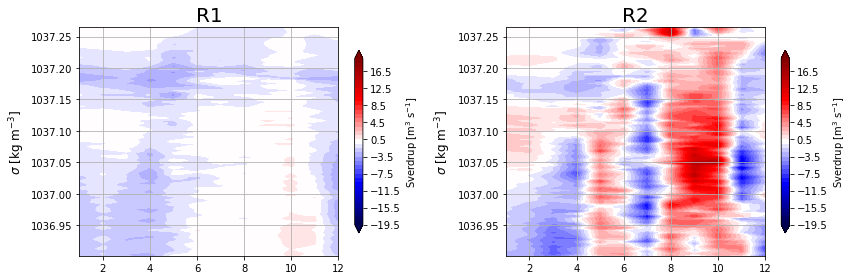

In [13]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

levels = np.arange(-20, 20) + 0.5

c = ax0.contourf(clim.R1.month, 
                   clim.R1.sigma2_bin, 
                   clim.R1.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
ax0.grid()

c = ax1.contourf(clim.R2.month, 
                   clim.R2.sigma2_bin, 
                   clim.R2.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax1)
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.grid()

plt.tight_layout();

## Anomaly

In [14]:
anom

<xarray.Dataset>
Dimensions:           (time: 366, sigma2_bin: 99)
Coordinates:
  * sigma2_bin        (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
  * time              (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-31
Data variables:
    R1                (time, sigma2_bin) float64 nan nan nan ... 0.3865 0.3141
    R2                (time, sigma2_bin) float64 nan nan nan ... -1.014 -0.8315
    dVdt              (time, sigma2_bin) float64 nan nan ... 0.001724 0.0008233
    omega_mix         (time, sigma2_bin) float32 nan nan nan ... 1.649 1.342
    omega_surf_slt    (time, sigma2_bin) float32 nan nan nan ... 0.5665 0.3989
    omega_surf_th     (time, sigma2_bin) float32 nan nan nan ... -2.348 -1.833
    omega_trans_rate  (time, sigma2_bin) float32 nan nan nan ... 1.024 0.8098
    psi_vel           (time, sigma2_bin) float64 nan nan nan nan ... 0.0 0.0 0.0

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
year_start_index =[0,73, 146, 220, 293]

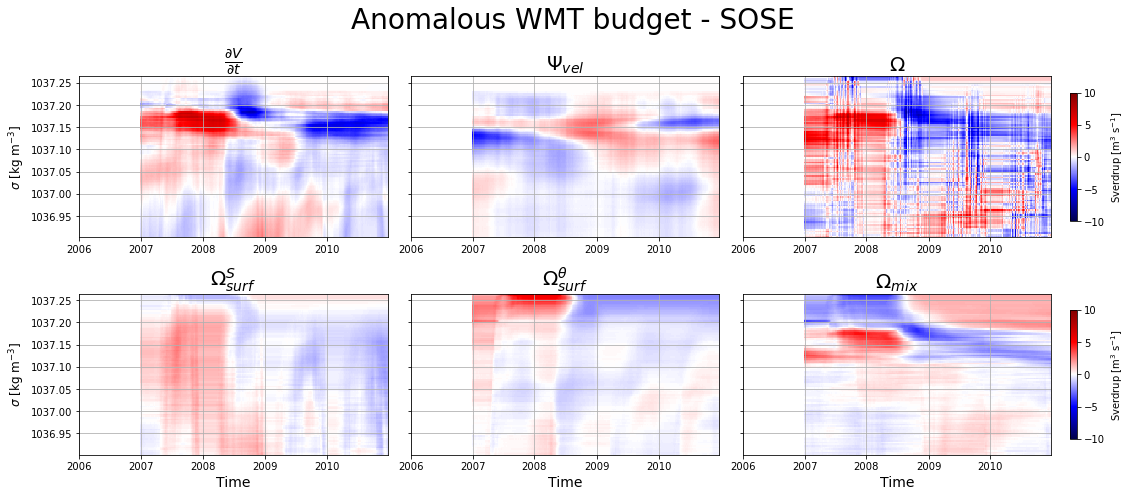

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

c = ax[0,0].pcolormesh(anom.dVdt.time, 
                   anom.dVdt.sigma2_bin, 
                   anom.dVdt.T, vmin=-10, vmax=10, cmap='seismic')
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_xticks(anom.dVdt.time[year_start_index])
ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax[0,0].grid()

c_psi = ax[0,1].pcolormesh(anom.psi_vel.time, anom.psi_vel.sigma2_bin, anom.psi_vel.T,
                        vmin=-10, vmax=10, cmap='seismic')
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
#ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(anom.dVdt.time[year_start_index])
ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax[0,1].grid()

c_omega = ax[0,2].pcolormesh(anom.omega_trans_rate.time, anom.omega_trans_rate.sigma2_bin, anom.omega_trans_rate.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_xticks(anom.dVdt.time[year_start_index])
ax[0,2].set_xticklabels(np.arange(2006, 2011))
ax[0,2].grid()

c_surf_slt = ax[1,0].pcolormesh(anom.omega_surf_slt.time, 
                                anom.omega_surf_slt.sigma2_bin, 
                                anom.omega_surf_slt.T, vmin=-10, vmax=10, cmap='seismic')
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Time', fontsize=14)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_xticks(anom.dVdt.time[year_start_index])
ax[1,0].set_xticklabels(np.arange(2006, 2011))
ax[1,0].grid()

c_surf_th = ax[1,1].pcolormesh(anom.omega_surf_th.time, anom.omega_surf_th.sigma2_bin, 
                        anom.omega_surf_th.T, vmin=-10, vmax=10, cmap='seismic')
ax[1,1].set_xlabel('Time', fontsize=14)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
#ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(anom.dVdt.time[year_start_index])
ax[1,1].set_xticklabels(np.arange(2006, 2011))
ax[1,1].grid()

c_mix = ax[1,2].pcolormesh(anom.omega_mix.time, anom.omega_mix.sigma2_bin, anom.omega_mix.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
ax[1,2].set_xlabel('Time', fontsize=14)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_xticks(anom.dVdt.time[year_start_index])
ax[1,2].set_xticklabels(np.arange(2006, 2011))
ax[1,2].grid()

plt.suptitle('Anomalous WMT budget - SOSE', fontsize=28)
plt.tight_layout();

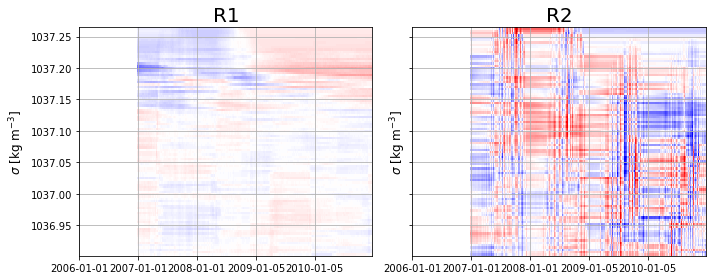

In [18]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)#, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

c = ax0.pcolormesh(anom.R1.time, 
                   anom.R1.sigma2_bin, 
                   anom.R1.T, vmin=-10, vmax=10, cmap='seismic')
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
ax0.set_xticks(anom.dVdt.time.values[year_start_index])
ax0.grid()

c = ax1.pcolormesh(anom.R2.time, 
                   anom.R2.sigma2_bin, 
                   anom.R2.T, vmin=-10, vmax=10, cmap='seismic')
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.set_xticks(anom.dVdt.time.values[year_start_index])
ax1.grid()
plt.tight_layout();

## Indices

In [94]:
indices

<xarray.Dataset>
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    enso             (time) float32 -0.7034 -0.6278 -0.392 ... -1.47 -1.44
    fw_flx           (time) float32 0.06174 0.3266 -0.6006 ... -0.1008 0.9542
    heat_flx         (time) float32 0.9099 0.5741 0.6695 ... 0.2288 -0.04812
    sam              (time) float64 0.1723 -1.534 1.666 ... 3.167 3.901 0.09625
    sose             (time) float32 -0.1024 -0.3163 -0.7164 ... -0.4328 -0.4636
    windstress_curl  (time) float32 0.1545 0.4456 0.4518 ... -2.025 -0.3768

In [112]:
deep

<xarray.Dataset>
Dimensions:           (time: 366)
Coordinates:
  * time              (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-31
Data variables:
    R1                (time) float64 nan nan nan nan ... -0.9546 -1.244 -1.39
    R2                (time) float64 nan nan nan nan ... -0.2517 -0.316 -0.2989
    dVdt              (time) float64 nan nan nan nan ... -1.206 -1.268 -1.269
    omega_mix         (time) float64 nan nan nan nan ... -2.17 -2.288 -2.185
    omega_surf_slt    (time) float64 nan nan nan nan ... -1.7 -1.757 -1.786
    omega_surf_th     (time) float64 nan nan nan nan ... -0.3095 -0.2313 -0.1964
    omega_trans_rate  (time) float64 nan nan nan nan ... -1.444 -1.438 -1.455
    psi_vel           (time) float64 nan nan nan nan ... 2.301 2.378 2.42 2.432

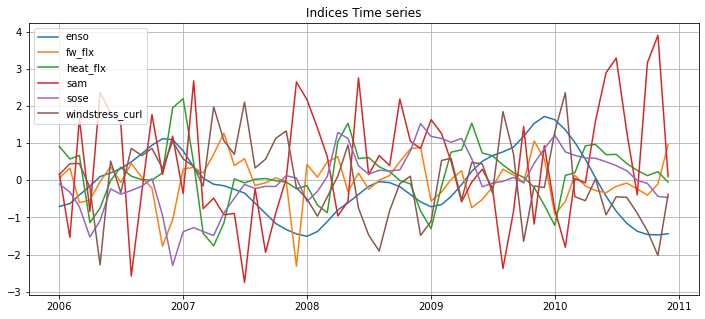

In [111]:
fig, ax = plt.subplots(figsize=(12,5))
for i in indices.variables:
    if i =='time':
        continue
    ax.plot(indices.time, indices[i], label=f'{indices[i].name}')
    
plt.legend()
plt.grid()
plt.title('Indices Time series');

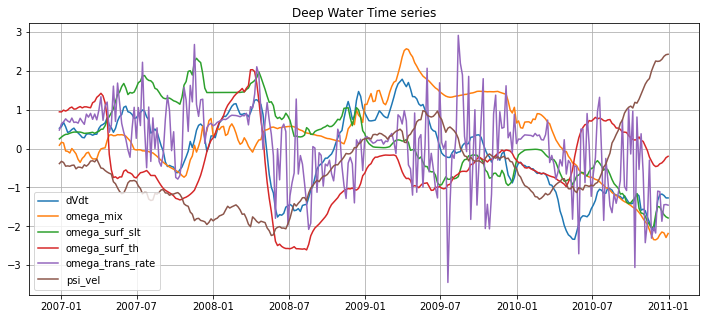

In [119]:
fig, ax = plt.subplots(figsize=(12,5))
for i in deep.variables:
    if i =='time':
        continue
    if i=='R1':
        continue
    if i=='R2':
        continue
    ax.plot(deep.time, deep[i], label=f'{deep[i].name}')
    
plt.legend()
plt.grid()
plt.title('Deep Water Time series');

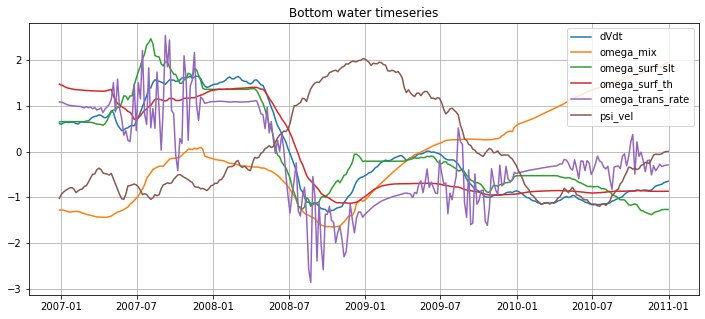

In [118]:
fig, ax = plt.subplots(figsize=(12,5))
for i in bottom.variables:
    if i =='time':
        continue
    if i=='R1':
        continue
    if i=='R2':
        continue
    ax.plot(bottom.time, bottom[i], label=f'{bottom[i].name}')
    
plt.legend()
plt.grid()
plt.title('Bottom water timeseries');

## Heat map of Corralation matrices

In [134]:
import seaborn as sn

In [122]:
indices_df = indices.to_dataframe()
indices_df.head()

,enso,fw_flx,heat_flx,sam,sose,windstress_curl
time,,,,,,
2006-01-01,-0.703412,0.061736,0.909883,0.172308,-0.102403,0.154478
2006-02-01,-0.627783,0.326616,0.574079,-1.533846,-0.316302,0.445615
2006-03-01,-0.392023,-0.600639,0.669474,1.665538,-0.716384,0.451785
2006-04-01,-0.160018,-0.538129,-1.137979,-0.839846,-1.526455,-0.196582
2006-05-01,0.099242,-0.036327,-0.748289,2.373692,-1.089656,-2.279050


### Deep Water Corr Matrix

In [126]:
deep.resample(time='MS').mean()

<xarray.Dataset>
Dimensions:           (time: 60)
Coordinates:
  * time              (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    R1                (time) float64 nan nan nan nan ... -1.046 -1.65 -1.368
    R2                (time) float64 nan nan nan nan ... -1.124 -0.1339 -0.1639
    dVdt              (time) float64 nan nan nan nan ... -1.347 -1.826 -1.321
    omega_mix         (time) float64 nan nan nan nan ... -1.575 -2.048 -2.238
    omega_surf_slt    (time) float64 nan nan nan nan ... -1.39 -1.88 -1.65
    omega_surf_th     (time) float64 nan nan nan nan ... 0.2499 -0.1241 -0.3431
    omega_trans_rate  (time) float64 nan nan nan nan ... -0.2611 -1.599 -1.511
    psi_vel           (time) float64 nan nan nan nan ... 0.808 1.197 1.814 2.327

In [129]:
deep_df = deep.resample(time='MS').mean().to_dataframe()
deep_df.head()

,R1,R2,dVdt,omega_mix,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel
time,,,,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
deep_ind = pd.concat([deep_df, indices_df], axis=1)
deep_ind.tail()

,R1,R2,dVdt,omega_mix,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel,enso,fw_flx,heat_flx,sam,sose,windstress_curl
time,,,,,,,,,,,,,,
2010-08-01,-0.732610,0.669280,-1.101533,-1.100016,-0.727832,0.666261,-1.121124,-0.003222,-1.156375,-0.074501,0.452923,1.304531,0.256971,-0.459329
2010-09-01,-0.820570,-0.743931,-1.273671,-1.336341,-1.227721,0.438083,-0.374826,0.807966,-1.372571,-0.232771,0.265406,-0.392656,-0.005690,-0.887641
2010-10-01,-1.045891,-1.123883,-1.346818,-1.574599,-1.390394,0.249915,-0.261085,1.197432,-1.459237,-0.402171,0.126579,3.167031,-0.085412,-1.363300
2010-11-01,-1.649880,-0.133936,-1.825993,-2.048247,-1.880278,-0.124135,-1.599207,1.813592,-1.470133,-0.100824,0.228844,3.901406,-0.432815,-2.025066
2010-12-01,-1.368065,-0.163927,-1.320854,-2.237861,-1.650450,-0.343129,-1.511382,2.327367,-1.439778,0.954187,-0.048120,0.096250,-0.463637,-0.376755


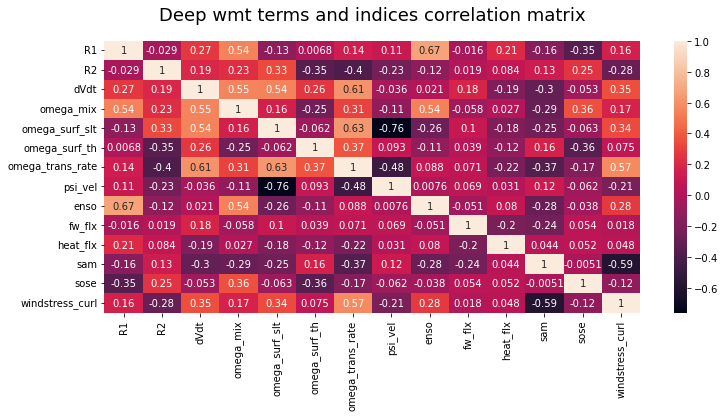

In [143]:
plt.figure(figsize=(12,5))
sn.heatmap(deep_ind.corr(), annot=True)
plt.title('Deep wmt terms and indices correlation matrix', fontsize=18, pad=20.5);

### Bottom Waterr Corr Matrix

In [144]:
bottom_df = bottom.resample(time='MS').mean().to_dataframe()
bottom_df.head()

,R1,R2,dVdt,omega_mix,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel
time,,,,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
bottom_ind = pd.concat([bottom_df, indices_df], axis=1)
bottom_ind.tail()

,R1,R2,dVdt,omega_mix,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel,enso,fw_flx,heat_flx,sam,sose,windstress_curl
time,,,,,,,,,,,,,,
2010-08-01,1.137889,-0.206450,-1.101051,1.493661,-0.909198,-0.877245,-0.468518,-1.019885,-1.156375,-0.074501,0.452923,1.304531,0.256971,-0.459329
2010-09-01,1.177008,-0.826916,-0.955202,1.582155,-1.076844,-0.866691,-0.212309,-0.588181,-1.372571,-0.232771,0.265406,-0.392656,-0.005690,-0.887641
2010-10-01,1.214533,-1.365893,-0.858221,1.675813,-1.196864,-0.858611,0.028833,-0.362851,-1.459237,-0.402171,0.126579,3.167031,-0.085412,-1.363300
2010-11-01,1.244309,-0.734295,-0.838756,1.758919,-1.344753,-0.864762,-0.310078,-0.213766,-1.470133,-0.100824,0.228844,3.901406,-0.432815,-2.025066
2010-12-01,1.273887,-0.576407,-0.705304,1.878033,-1.285423,-0.870608,-0.326588,-0.035743,-1.439778,0.954187,-0.048120,0.096250,-0.463637,-0.376755


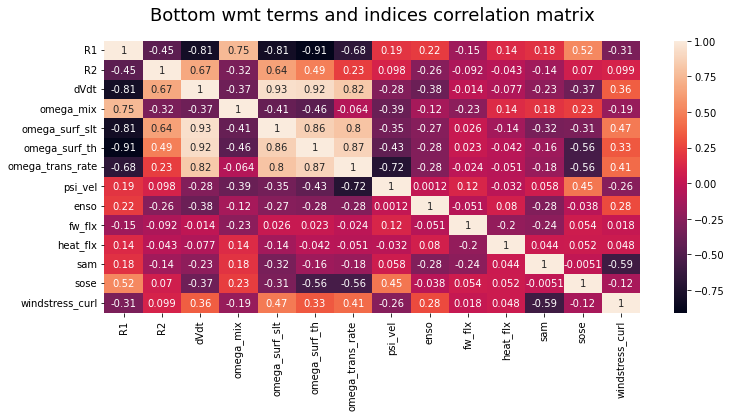

In [146]:
plt.figure(figsize=(12,5))
sn.heatmap(bottom_ind.corr(), annot=True)
plt.title('Bottom wmt terms and indices correlation matrix', fontsize=18, pad=20.5);

### Correlation matrix of all terms (deep, bottom, indices)

In [153]:
corr_matrix = pd.concat([deep_df, bottom_df, indices_df], axis=1)
#corr_matrix = pd.concat([deep_ind, bottom_df], axis=1)
corr_matrix.head()

,R1,R2,dVdt,omega_mix,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel,R1,R2,...,omega_surf_slt,omega_surf_th,omega_trans_rate,psi_vel,enso,fw_flx,heat_flx,sam,sose,windstress_curl
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.703412,0.061736,0.909883,0.172308,-0.102403,0.154478
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.627783,0.326616,0.574079,-1.533846,-0.316302,0.445615
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.392023,-0.600639,0.669474,1.665538,-0.716384,0.451785
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.160018,-0.538129,-1.137979,-0.839846,-1.526455,-0.196582
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.099242,-0.036327,-0.748289,2.373692,-1.089656,-2.279050


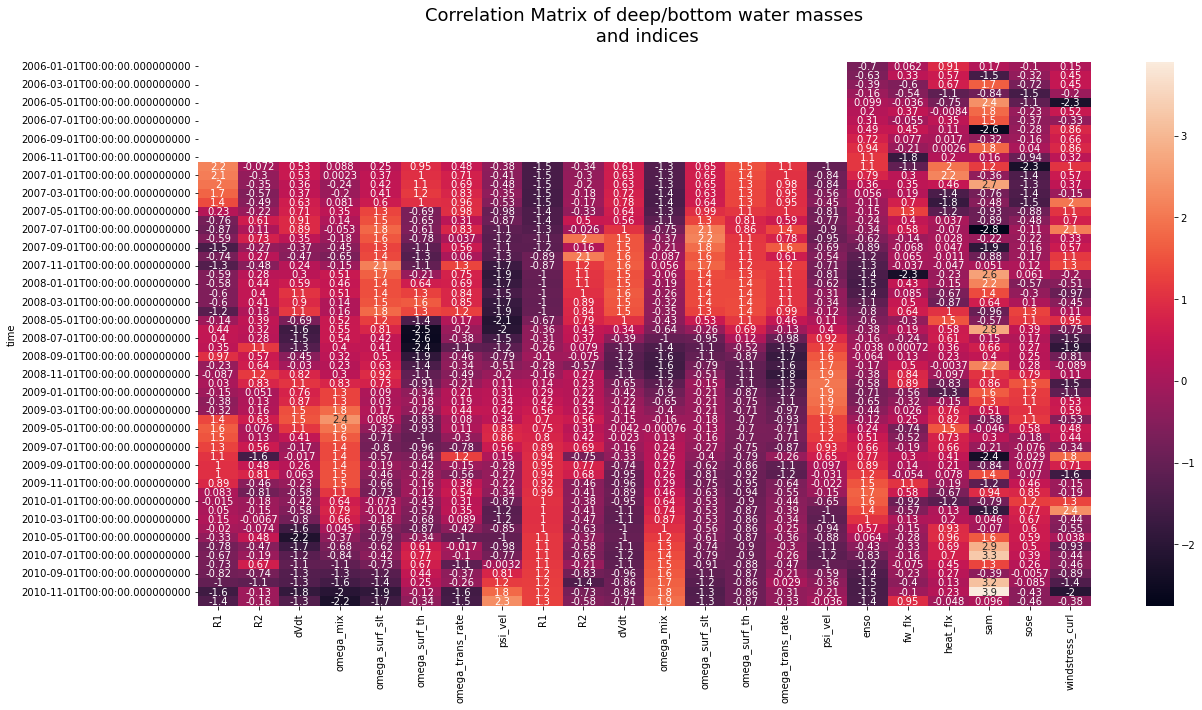

In [154]:
plt.figure(figsize=(20,10))
sn.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of deep/bottom water masses\n and indices', fontsize=18, pad=20.5);